In [42]:
import rdflib
import pandas as pd
import requests
import yaml
import matplotlib.pyplot as plt
from IPython.display import display, Markdown


In [43]:
fdp = "https://w3id.org/duchenne-fdp/"
title = "Duchenne_FDP"

In [44]:
fetched_urls = set()

def parse_graph(graph, fdp, url):
    try:
        graph.parse(url, format="ttl")
        uris["resolve"].append(url)
        fetched_urls.add(url)
        return True
    except Exception as e:
        print("Could not parse: " + url)
        uris["not_resolve"].append(url)
        print(e)
        return False

def fetchMetaData(graph, fdp, url):
    if parse_graph(graph, fdp, url):
        query = """
        PREFIX ldp: <http://www.w3.org/ns/ldp#>
        SELECT ?o WHERE {
            ?s ldp:contains ?o .
        }
        """
        results = graph.query(query)
        for row in results:
            resolve_url(graph, fdp, str(row["o"]) + "?format=ttl")

def resolve_url(graph, fdp, url):
    if parse_graph(graph, fdp, url):
        query = """
        PREFIX ldp: <http://www.w3.org/ns/ldp#>
        SELECT ?o WHERE {
            ?s ldp:contains ?o .
        }
        """

        datasetsgraph = rdflib.Graph()
        if parse_graph(datasetsgraph, fdp, url):
            datasetsgraph.parse(url, format="ttl")
            datasetsTempResults = datasetsgraph.query(query)
            for row in datasetsTempResults:
                resolve_url(datasetsgraph, fdp, str(row["o"]) + "?format=ttl")

fdpgraph = rdflib.Graph()
uris = {"resolve": [], "not_resolve": []}
fetchMetaData(fdpgraph, fdp, fdp + "?format=ttl")

In [45]:
for node in fdpgraph.all_nodes():
    if isinstance(node, rdflib.URIRef):
        url = str(node)
        if url not in fetched_urls:
            try:
                # print("Fetching: " + url)
                fdpgraph.parse(url)
                uris["resolve"].append(url)
                fetched_urls.add(url)
            except:
                uris["not_resolve"].append(url)
                # print("Could not parse: " + url)
                continue

In [46]:
def save_dict_to_yaml(dictionary, filepath):
    with open(filepath, 'w') as file:
        yaml.dump(dictionary, file)

# Save dictionary as YAML
save_dict_to_yaml(uris, title+'.yaml')

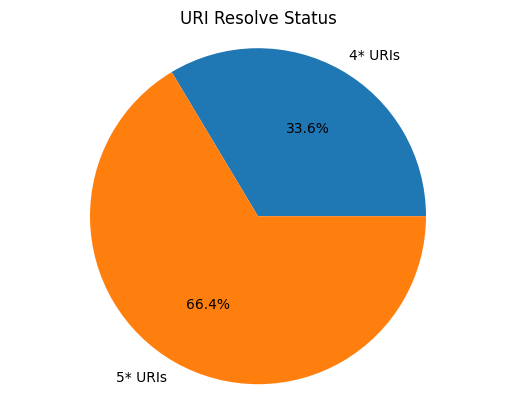

In [52]:
with open(title+'.yaml', 'r') as file:
    data = yaml.safe_load(file)

values = [len(data["not_resolve"]), len(data["resolve"])]
values = [int(value) for value in values]  # Convert values to integers

labels = ['4* URIs', '5* URIs']

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')

plt.title('URI Resolve Status')
plt.show()


In [53]:
from urllib.parse import urlparse
urls = dict()

for url in data["not_resolve"]:

    urlsections = urlparse(url)
    paths = urlsections.path.strip('/').split('/')
    if urlsections.netloc not in urls.keys():
        urls[urlsections.netloc] = []
    urls[urlsections.netloc].append(urlsections.path)

def dict_to_markdown_list(d):
    md = ''
    for k, v in d.items():
        if isinstance(v, list):
            md += f'- **{k}:**\n'
            for item in v:
                md += f'  - {item}\n'
        elif isinstance(v, dict):
            md += f'## {k}\n'
            md += dict_to_markdown_list(v)
        else:
            md += f'- **{k}:** {v}\n'
    return md

md = dict_to_markdown_list(urls)


display(Markdown(md))

- **xmlns.com:**
  - /foaf/0.1/Agent
- **purl.obolibrary.org:**
  - /obo/HP_0032321
  - /obo/HP_0000708
  - /obo/HP_0002020
  - /obo/HP_0020110
  - /obo/HP_0006957
  - /obo/HP_0000819
  - /obo/HP_0008366
  - /obo/HP_0000750
  - /obo/UBERON_0001434
  - /obo/HP_0002987
  - /obo/HP_0003270
  - /obo/HP_0002194
  - /obo/HP_0033454
  - /obo/HP_0002014
  - /obo/HP_0030193
  - /obo/HP_0001270
  - /obo/HP_0008981
  - /obo/HP_0005997
  - /obo/HP_0009473
  - /obo/HP_0033333
  - /obo/HP_0002650
  - /obo/HP_0001263
  - /obo/HP_0003044
  - /obo/HP_0002019
  - /obo/HP_0006380
- **rdflicense.appspot.com:**
  - /rdflicense/cc-by-nc-nd4.0
- **www.orpha.net:**
  - /ORDO/Orphanet_98895
  - /ORDO/Orphanet_98896
- **w3id.org:**
  - /duchenne-fdp/dataset/
  - /duchenne-fdp/catalog/ce01b2e8-3a1d-434e-b5e2-98e3a8d78a5b/metrics/445c0a70d1e214e545b261559e2842f4
  - /fdp/fdp-o
  - /duchenne-fdp/metrics/5d27e854a9e78eb3f663331cd47cdc13
  - /duchenne-fdp/metrics/445c0a70d1e214e545b261559e2842f4
  - /duchenne-fdp/catalog/
  - /fdp/fdp-o
  - /duchenne-fdp/catalog/ce01b2e8-3a1d-434e-b5e2-98e3a8d78a5b/metrics/5d27e854a9e78eb3f663331cd47cdc13
  - /fdp/fdp-o
- **purl.org:**
  - /spar/datacite/Identifier
  - /ejp-rd/vocabulary/VPQueryable
  - /ejp-rd/vocabulary/VPDiscoverable
- **www.dpp_ontology.net:**
  - /terms/Intermediate
- **www.wikidata.org:**
  - /wiki/Q8777
- **www.ietf.org:**
  - /rfc/rfc3986.txt
